In [ ]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization,Input,UpSampling2D
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import regularizers
import cv2
from tqdm import tqdm
import random
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import *
from sklearn.cluster import KMeans
import tensorflow.compat.v1 as tf

from keras.utils.vis_utils import plot_model
from IPython.display import Image
from keras import backend as K

In [ ]:
def preprocess_img(img_path):
    dsize = (img_width, img_height)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize)
    new_image=np.expand_dims(new_image,axis=0)
    new_image=np.flip(new_image,axis=-1)
    return new_image

In [ ]:
def apk(actual, predicted, k=10):

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):

    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
def random_rotate_and_flip(arr):
    
    num_transf = random.randint(0, 3)
    for i in range(num_transf):
        arr = np.rot90(arr)
        
    flip = random.randint(0, 1)
    if(flip):
        flip_axis = random.randint(0, 1)
        arr = np.flip(arr, axis=flip_axis)
    return arr

In [ ]:
class CustomDataGenerator(Sequence):
    def __init__(self, x_set, batch_size, width, height):
        self.x = x_set
        self.batch_size = batch_size
        self.width  = width
        self.height = height
        
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):

        batch_ = self.x[idx * self.batch_size : (idx + 1) * self.batch_size] 
        batch_ = np.array([random_rotate_and_flip((1./255)*preprocess_img(x)[0]) for x in batch_])
        
        return batch_, batch_

In [ ]:
img_width, img_height = (256, 256)
BATCH_SIZE = 4

In [ ]:
# path='./dataset'

# datagen = ImageDataGenerator(rescale=1./255)
# img_data=datagen.flow_from_directory(path, target_size=(img_width, img_height), class_mode='input', batch_size=BATCH_SIZE,shuffle=False)

In [ ]:
full_paths = ['C:/Users/Rod/Desktop/Tarea 3/dataset/database-full/' + x for x in os.listdir('./dataset/database-full/')]

In [ ]:
img_data = CustomDataGenerator(full_paths, 2, img_width, img_height)

In [ ]:
# plt.figure(figsize=(15,15))
# for images in img_data.next():
#     for i in range(4):
#         ax = plt.subplot(4, 4, i + 1)
#         ax.imshow(images[i])
#         ax.axis("off")

# Auto Encoder RGB

In [ ]:
batch_size = 2
pretrain_optimizer = tf.keras.optimizers.Adam()
pretrain_epochs = 3

In [ ]:
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
# LATENT SPACE
latentSize = (16*16*8)

# input_img = keras.Input(shape=(img_width, img_height, 3))

# x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# encoded = layers.Flatten()(x)
# #encoded = layers.Dense(units=latentSize, activation='sigmoid')(x)

# # DECODER
# direct_input = keras.Input(shape=latentSize)
# #x = layers.Dense(units=latentSize, activation='sigmoid')(direct_input)
# x = layers.Reshape((16, 16, 8))(direct_input)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), activation='relu',padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# decoded = layers.Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)

# encoder = keras.Model(input_img, encoded)
# decoder = keras.Model(direct_input,decoded)
# autoencoder = keras.Model(input_img, decoder(encoded))
# autoencoder.compile(optimizer=pretrain_optimizer, loss='mse', metrics=['accuracy'])





################################################################################
# Encoder
input_img2 = keras.Input(shape=(img_width, img_height, 3))
x2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img2)
x2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.MaxPooling2D((2, 2), padding='same')(x2)

x2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.MaxPooling2D((2, 2), padding='same')(x2)

x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img2)
x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.MaxPooling2D((8, 8), padding='same')(x2)

# x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img2)
# x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
# x2 = layers.MaxPooling2D((8, 8), padding='same')(x2)

x2 = layers.Flatten()(x2)
x2 = layers.Dropout(.30)(x2)
x2 = layers.BatchNormalization()(x2)
encoded2 = layers.Dense(units=5120, activation='sigmoid')(x2)

# DECODER
direct_input2 = keras.Input(shape=5120)
x2 = layers.Dense(units=latentSize, activation='sigmoid')(direct_input2)
x2 = layers.Reshape((16, 16, 8))(x2)
x2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.UpSampling2D((2, 2))(x2)
x2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.UpSampling2D((2, 2))(x2)
x2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = layers.UpSampling2D((2, 2))(x2)
x2 = layers.Conv2D(64, (3, 3), activation='relu',padding='same')(x2)
x2 = layers.UpSampling2D((2, 2))(x2)
decoded2 = layers.Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x2)

encoder2 = keras.Model(input_img2, encoded2)
decoder2 = keras.Model(direct_input2, decoded2)
autoencoder2 = keras.Model(input_img2, decoder2(encoded2))
autoencoder2.compile(optimizer=pretrain_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                           

In [ ]:
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)    
    
    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(name='clusters', shape=(self.n_clusters, input_dim), initializer='glorot_uniform') 
        
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True    
    
    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) 
        
        return q
    
    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters    
    
    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
n_clusters = 167

clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder2.output)
model = Model(inputs=encoder2.input, outputs=[clustering_layer, autoencoder2.output])

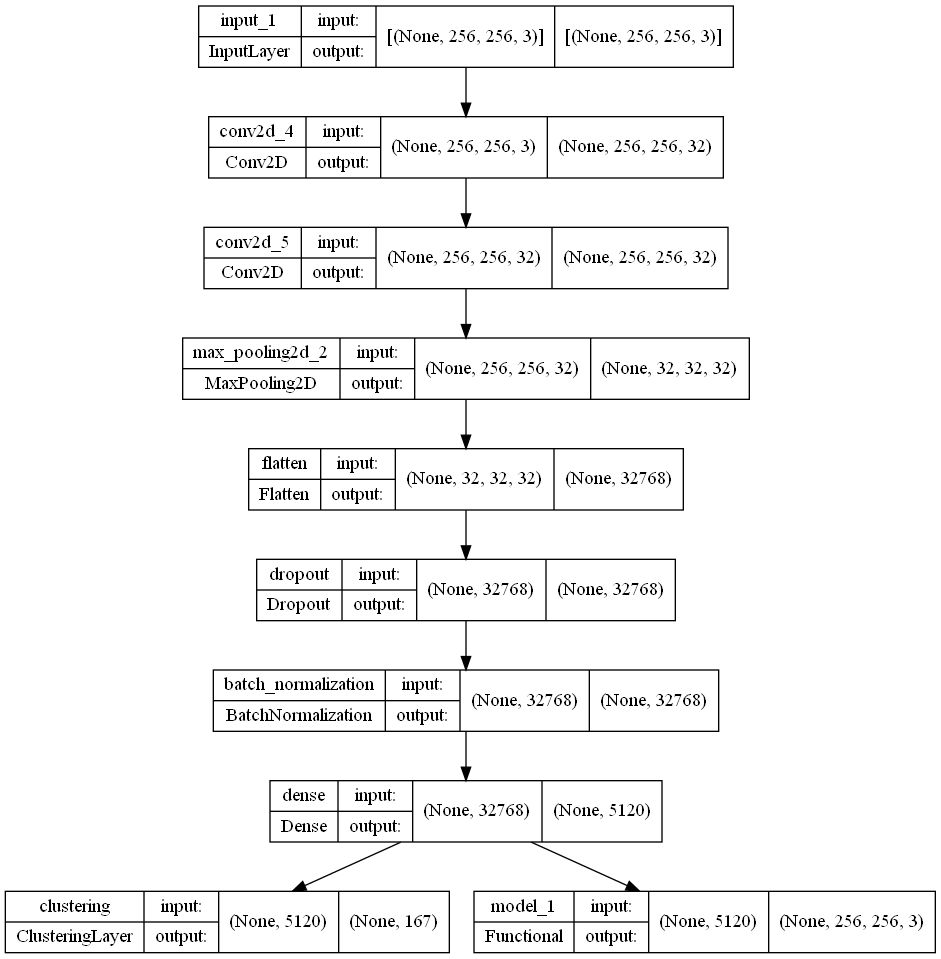

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
autoencoder2.fit(img_data, epochs = pretrain_epochs)

Epoch 1/3


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model_2/dense/MatMul/MatMul_1' defined at (most recent call last):
    File "c:\users\rod\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\users\rod\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel\kernelapp.py", line 619, in start
      self.io_loop.start()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel\kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-15-8942764c2e2a>", line 1, in <module>
      autoencoder2.fit(img_data, epochs = pretrain_epochs)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "c:\users\rod\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_2/dense/MatMul/MatMul_1'
OOM when allocating tensor with shape[32768,5120] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_2/dense/MatMul/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1967]

In [ ]:
autoencoder.save("autoencoder.h5")
encoder.save("encoder.h5")
decoder.save("decoder.h5")

In [ ]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

loss = 0
index = 0
maxiter = 10 
update_interval = 1 
tol = 0.001 # tolerance threshold to stop training


kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(img_data, verbose=1))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])
y_pred_last = np.copy(y_pred)

model.compile(loss=['kld', 'mse'], loss_weights=[0.1, 1], optimizer=pretrain_optimizer)

cl_model =  Model(model.get_layer(name='clustering').input, model.get_layer(name='clustering').output )

index_array = [x for x in range(31783)]

for ite in range(int(maxiter)):
    print(f"Starting iter {ite} of {maxiter} iterations")
    if ite % update_interval == 0:
        #q, _  = model.predict(img_data, verbose=0, batch_size=BATCH_SIZE)
        q = cl_model.predict(encoder.predict(img_data, verbose=1), verbose=0, batch_size=BATCH_SIZE) 
        p = target_distribution(q)  
        y_pred = q.argmax(1)        # check stop criterion
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, 31783)]
    lote = np.array([img_data.__getitem__(id_)[0][0] for id_ in idx])
    loss = model.train_on_batch(x=lote, y=[p[idx], lote])
    index = index + 1 if (index + 1) * batch_size <= 31783 else 0

7946/7946 [==============================] - 481s 61ms/step
Starting iter 0 of 10 iterations
7946/7946 [==============================] - 489s 62ms/step
Starting iter 1 of 10 iterations
7946/7946 [==============================] - 491s 62ms/step
Starting iter 2 of 10 iterations
7946/7946 [==============================] - 490s 62ms/step
Starting iter 3 of 10 iterations
7946/7946 [==============================] - 494s 62ms/step
Starting iter 4 of 10 iterations
7946/7946 [==============================] - 501s 63ms/step
Starting iter 5 of 10 iterations
7946/7946 [==============================] - 498s 63ms/step
Starting iter 6 of 10 iterations
7946/7946 [==============================] - 494s 62ms/step
Starting iter 7 of 10 iterations
7946/7946 [==============================] - 499s 63ms/step
Starting iter 8 of 10 iterations
7946/7946 [==============================] - 493s 62ms/step
Starting iter 9 of 10 iterations
7946/7946 [==============================] - 495s 62ms/step


In [ ]:
autoencoder.save("post_autoencoder.h5")
encoder.save("post_encoder.h5")
decoder.save("post_decoder.h5")

In [ ]:
cl_model.save("clustering.h5")

In [ ]:
latents = encoder.predict(img_data, verbose=1)

7946/7946 [==============================] - 495s 62ms/step


In [ ]:
q_ = cl_model.predict(latents)
p_ = target_distribution(q_)
y_pred = p_.argmax(1)

994/994 [==============================] - 2s 2ms/step


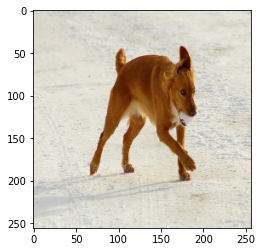

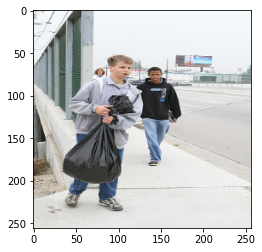

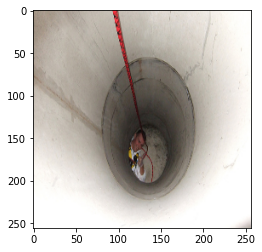

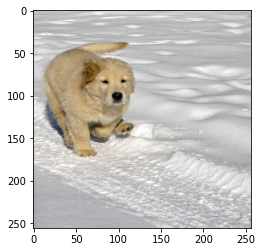

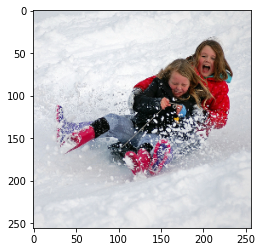

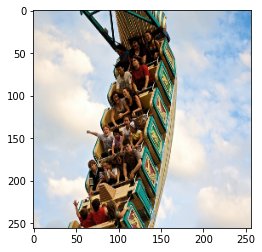

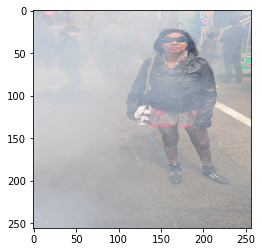

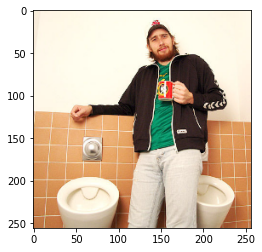

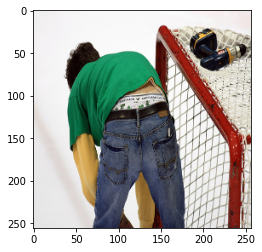

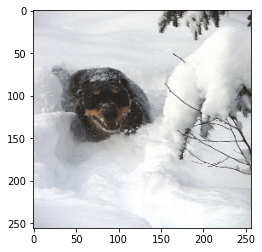

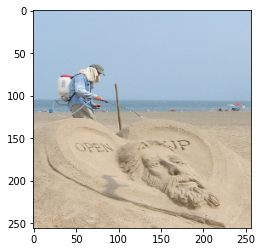

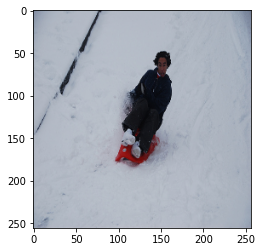

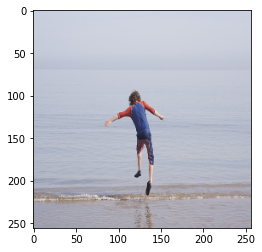

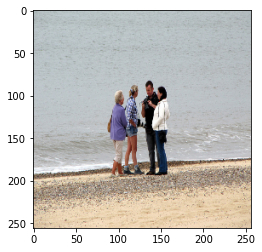

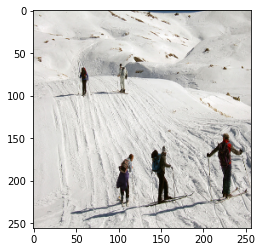

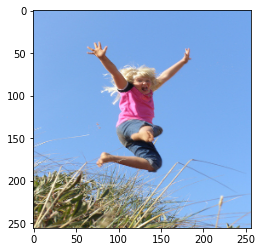

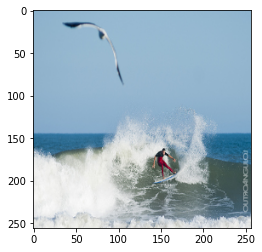

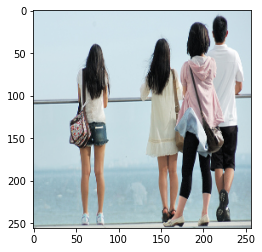

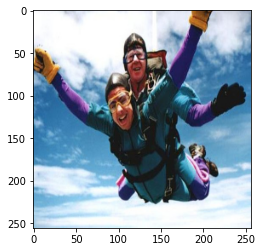

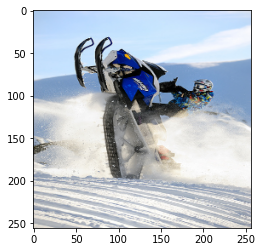

In [ ]:
for x in np.array(img_data.filepaths)[y_pred == 1][:20]:
    plt.imshow(preprocess_img(x)[0])
    plt.show()

In [ ]:
indices = [x[34:-4] for x in img_data.filenames]
encoded_df = pd.DataFrame({'img_name':indices, 'encoded':[x.flatten() for x in latents]})

In [ ]:
def sorting(tup, reverse=True):
    return(sorted(tup, key = lambda x: x[1],reverse=reverse))

In [ ]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cosine
def get_most_similars(query, database):
    
    x2 = database[database.img_name == query].encoded.values[0]
    
    distances = []
    names = []
    for i, fila in database.iterrows():

        x1 = fila.encoded
        names.append(fila.img_name)
        distances.append(np.linalg.norm(x1 - x2))
        
    distances = [(x,y) for x,y in zip(names, distances)]
    distances = sorting(distances, False)
        
    return np.array(distances)[:,0]

In [ ]:
encoded_df['cluster'] = y_pred

In [ ]:
encoded_df.head(5)

,img_name,encoded,cluster
0,0,"[0.68270254, 0.97293293, 1.1087692, 1.1661555,...",5
1,1,"[0.8171463, 0.88260216, 0.93343973, 1.0892751,...",5
2,10,"[1.2302302, 1.7080035, 1.5640966, 1.838297, 0....",5
3,100,"[1.4711636, 1.0454937, 0.9554608, 1.6045191, 1...",5
4,1000,"[0.67135656, 0.65541106, 0.28343707, 0.7934792...",0


In [ ]:
i = '46'

cluster = encoded_df[encoded_df.img_name == i].cluster.values[0]
most_sim=get_most_similars(i, encoded_df[encoded_df.cluster == cluster])

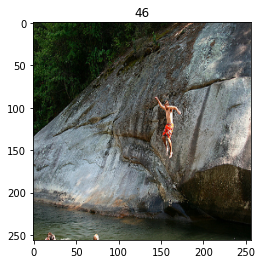

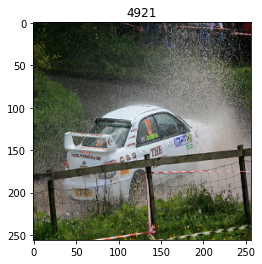

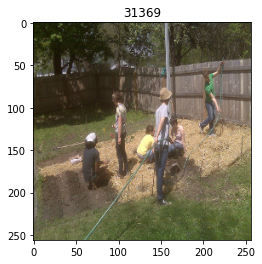

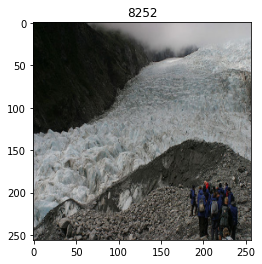

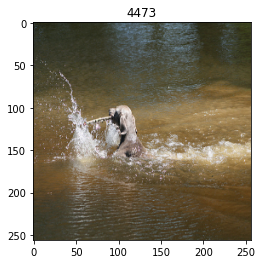

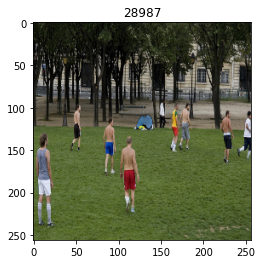

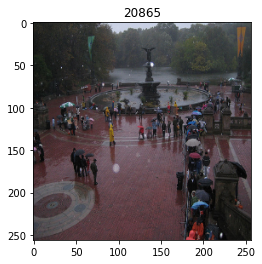

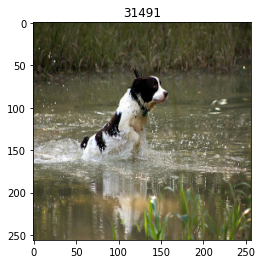

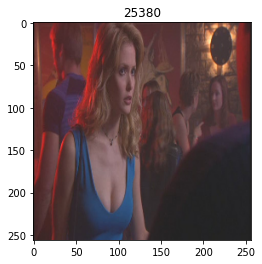

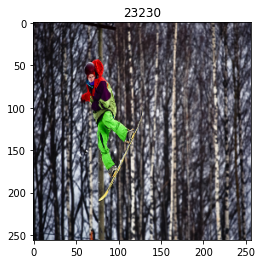

In [ ]:
for im in most_sim[:10]:
    plt.imshow(preprocess_img('dataset/database-full/database-full/ image' + im+".jpg")[0])
    plt.title(im)
    plt.show()